In [17]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
def build_vocabulary(sentence_iterator, word_count_threshold=0, save_variables=False): # borrowed this function from NeuralTalk

    print 'preprocessing word counts and creating vocab based on word count threshold %d' % (word_count_threshold)
    length_of_longest_sentence = np.max(map(lambda x: len(x.split(' ')), sentence_iterator))
    print 'Length of the longest sentence is %s'%length_of_longest_sentence
    word_counts = {}
    number_of_sentences = 0
    length_of_sentences =list()
    for sentence in sentence_iterator:
        number_of_sentences += 1
        length_of_sentences.append(len(sentence.lower().split(' ')))
        for current_word in sentence.lower().split(' '):
            word_counts[current_word] = word_counts.get(current_word, 0) + 1
    vocab = [current_word for current_word in word_counts if word_counts[current_word] >= word_count_threshold]
    print 'filtered words from %d to %d' % (len(word_counts), len(vocab))

    index_to_word_list = {}
    index_to_word_list[0] = '#END#'  # end token at the end of the sentence. make first dimension be end token
    word_to_index_list = {}
    word_to_index_list['#START#'] = 0 # make first vector be the start token
    current_index = 1

    for current_word in vocab:
        word_to_index_list[current_word] = current_index
        index_to_word_list[current_index] = current_word
        current_index += 1

    word_counts['#END#'] = number_of_sentences

    plt.subplot(2, 1, 1)
    plt.plot(length_of_sentences)
    plt.title('Word distribution')
    plt.xlabel('Sample #')
    plt.ylabel('Length of words')
    
    print np.mean(length_of_sentences)
    print np.max(length_of_sentences)
    print np.min(length_of_sentences)
    print np.median(length_of_sentences)
    
    if save_variables:
        print 'Completed processing captions. Saving work now ...'
        word_to_index_path = 'word_to_index.p'
        index_to_word_path = 'index_to_word.p'
        word_count_path = 'word_count.p'
        pickle.dump(word_to_index_list, open(word_to_index_path, "wb"))
        pickle.dump(index_to_word_list, open(index_to_word_path, "wb"))
        pickle.dump(word_counts, open(word_count_path, "wb"))

    return word_to_index_list, index_to_word_list, word_counts



In [19]:
annotation_path = 'training_set_recipes.p'
annotation_data = pickle.load(open(annotation_path, "rb"))
captions = annotation_data.values()
   

preprocessing word counts and creating vocab based on word count threshold 0
Length of the longest sentence is 747
filtered words from 71752 to 71752
135.501885714
747
11
124.0


({u'between.\npush': 1,
  u'agnolotti,': 15,
  u'batter.\nsprinkle': 4,
  u'campari,': 5,
  u'refrigerated.\nwhen': 7,
  u'drained\ngrated': 23767,
  u'ganache:\n1': 9,
  u'pb2\xae)\npreheat': 10,
  u'15-ounce': 11,
  u'improver\n1/4': 12,
  u'cake)': 37358,
  u'juice.\ndivide': 14,
  u'clotted': 16,
  u'brie.\non': 17,
  u'hanging': 18,
  u'3x1/2-inch': 19,
  u'woody': 20,
  u'breast-side-up': 2856,
  u'chicken.\ngrill': 22,
  u'collards,': 23,
  u'canes': 24,
  u'shells.\nmeanwhile,': 23770,
  u'incorporated.\nwring': 26,
  u'caramel;': 27,
  u'weeks.)\n': 59811,
  u'dressing.\nsprinkle': 30,
  u'brownies:\n1/2': 32,
  u'fresh\n1/2': 70057,
  u'hours.\nprior': 33,
  u'ganache:\n11': 35,
  u'inside.\nonce': 36,
  u'1/4-cup': 37,
  u'caramel,': 38,
  u'caramel.': 39,
  u'pomegranate.\n': 40,
  u'thawed\nline': 41,
  u'section.': 57334,
  u'slit.\nmix': 42,
  u'thickens.\nmeasure': 43,
  u'bruschetta': 11908,
  u'citrus': 52957,
  u'drain.\nchop': 45,
  u'spider,': 46,
  u"hunt's\xae)\n

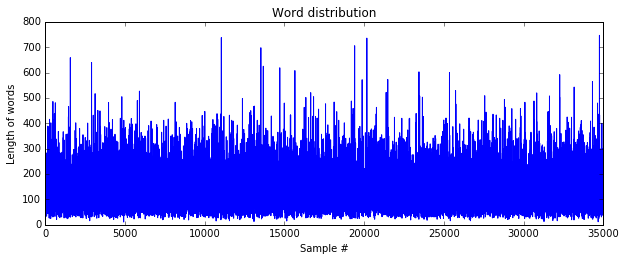

In [20]:
 build_vocabulary(captions)